In [1]:
# Step 1: Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Step 2: Load the data
file_path = '../data/Fraud_Data.csv'  # Adjust if you're running from another path
df = pd.read_csv(file_path)

# Step 3: Show basic info
print("Shape of the dataset:", df.shape)
df.head()


Shape of the dataset: (151112, 11)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [2]:
# Check for missing values
missing = df.isnull().sum()
missing[missing > 0]


Series([], dtype: int64)

In [4]:
# Step 3.1: Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
df = df.drop_duplicates()

# Step 3.2: Check data types
print("\nData types:")
print(df.dtypes)

# Convert signup_time and purchase_time to datetime
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

# Confirm changes
print("\nData types after conversion:")
print(df.dtypes)

# Step 3.3: Preview summary stats
df.describe(include='all')


Number of duplicate rows: 0

Data types:
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

Data types after conversion:
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
count,151112.000000,151112,151112,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112.000000
unique,NaN,NaN,NaN,NaN,137956,3,5,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,ITUMJCKWEYNDD,SEO,Chrome,M,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,20,60615,61432,88293,NaN,NaN,NaN
mean,200171.040970,2015-04-20 00:56:09.511329280,2015-06-16 02:56:38.759952896,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,0.093646
min,2.000000,2015-01-01 00:00:42,2015-01-01 00:00:44,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000
25%,100642.500000,2015-02-18 09:52:48.500000,2015-04-18 14:41:25.500000,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,0.000000
50%,199958.000000,2015-04-19 04:41:30,2015-06-18 13:46:17.500000,35.000000,NaN,NaN,NaN,NaN,33.000000,2.154770e+09,0.000000
75%,300054.000000,2015-06-18 14:47:22.750000128,2015-08-17 18:48:31.500000,49.000000,NaN,NaN,NaN,NaN,39.000000,3.243258e+09,0.000000
max,400000.000000,2015-08-18 04:40:29,2015-12-16 02:56:05,154.000000,NaN,NaN,NaN,NaN,76.000000,4.294850e+09,1.000000


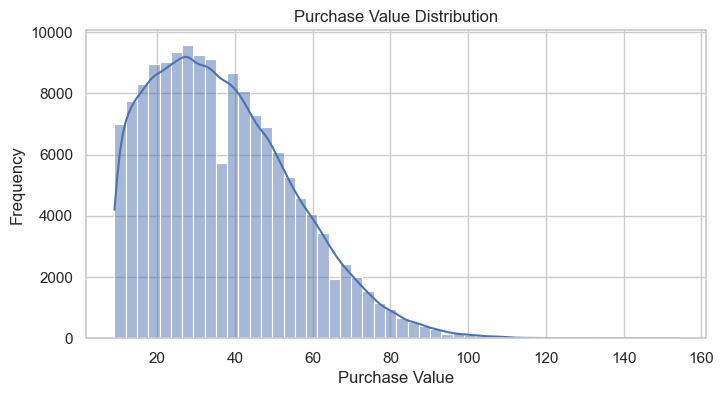

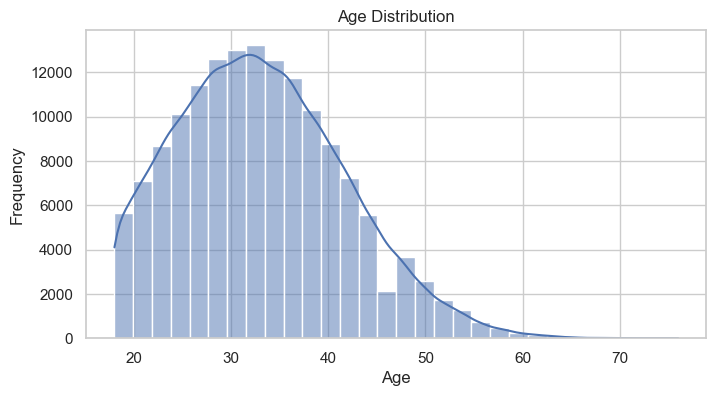

In [5]:
# Plot purchase value distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['purchase_value'], bins=50, kde=True)
plt.title('Purchase Value Distribution')
plt.xlabel('Purchase Value')
plt.ylabel('Frequency')
plt.show()

# Plot age distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


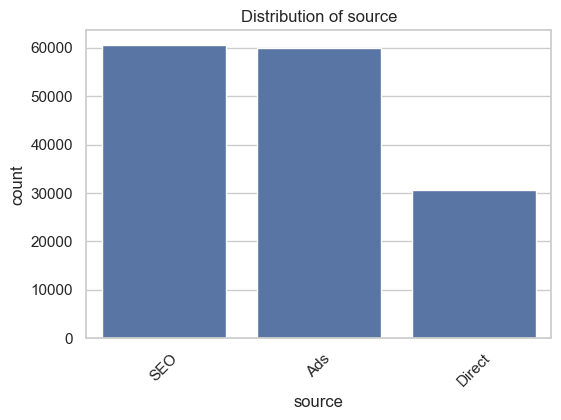

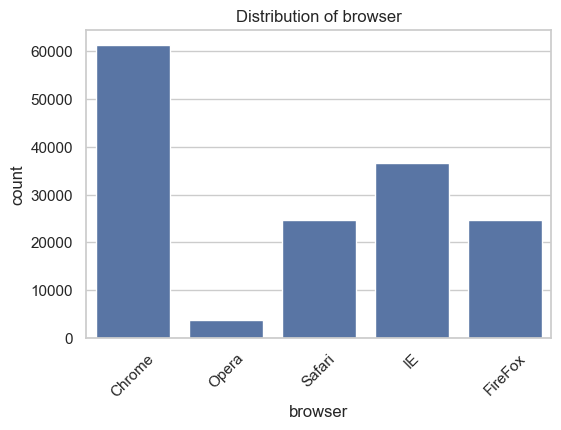

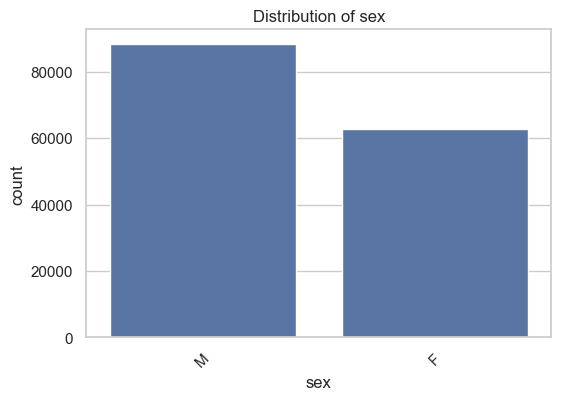

In [6]:
# Bar plots for categorical features
categorical = ['source', 'browser', 'sex']

for col in categorical:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


class
0    136961
1     14151
Name: count, dtype: int64


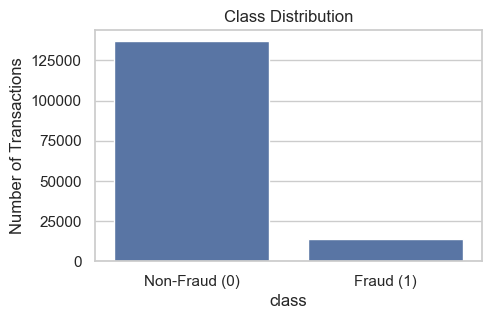

In [7]:
# Class distribution
class_counts = df['class'].value_counts()
print(class_counts)

# Plot it
plt.figure(figsize=(5, 3))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel('Number of Transactions')
plt.show()


In [9]:
# Load IP-to-country mapping data
ip_df = pd.read_csv('../data/IpAddress_to_Country.csv')
ip_df.head()


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [11]:
import ipaddress

# Clean IP address column — convert to string and handle invalid ones
def safe_ip_to_int(ip):
    try:
        return int(ipaddress.ip_address(str(ip).strip()))
    except ValueError:
        return np.nan  # mark invalid IPs as NaN

# Apply safe conversion
df['ip_int'] = df['ip_address'].apply(safe_ip_to_int)

# Drop rows where IP couldn't be converted
df = df.dropna(subset=['ip_int'])

# Convert to int
df['ip_int'] = df['ip_int'].astype(int)

# Preview
df[['ip_address', 'ip_int']].head()


,ip_address,ip_int


In [12]:
# Sort IP mapping data for merging
ip_df = ip_df.sort_values(by='lower_bound_ip_address')

# Merge using range lookup (vectorized with pandas' merge_asof)
ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype(int)
ip_df['upper_bound_ip_address'] = ip_df['upper_bound_ip_address'].astype(int)
df = df.sort_values('ip_int')

# Perform range join: find nearest lower_bound less than or equal to ip_int
df = pd.merge_asof(
    df, 
    ip_df[['lower_bound_ip_address', 'upper_bound_ip_address', 'country']], 
    left_on='ip_int', 
    right_on='lower_bound_ip_address', 
    direction='backward'
)

# Filter to only rows where ip_int is within the correct range
df = df[df['ip_int'] <= df['upper_bound_ip_address']]

# Preview
df[['ip_address', 'country']].head()


,ip_address,country


In [13]:
# Number of previous transactions by user
df['user_txn_count'] = df.groupby('user_id').cumcount()

# Number of previous transactions by device
df['device_txn_count'] = df.groupby('device_id').cumcount()


In [14]:
# Hour of day of the purchase
df['hour_of_day'] = df['purchase_time'].dt.hour

# Day of week of the purchase (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['purchase_time'].dt.dayofweek

# Time difference in seconds between signup and purchase
df['time_since_signup'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds()


In [24]:
# Convert float IPs to integers (drop NaNs just in case)
df['ip_int'] = df['ip_address'].apply(lambda x: int(float(x)) if pd.notnull(x) else np.nan)
df = df.dropna(subset=['ip_int'])
df['ip_int'] = df['ip_int'].astype(int)


In [28]:
# Re-read the IP-country data (to avoid partial/modified versions)
ip_df = pd.read_csv('../data/IpAddress_to_Country.csv')

# Clean and convert column types
ip_df.columns = ip_df.columns.str.strip()
ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype(int)
ip_df['upper_bound_ip_address'] = ip_df['upper_bound_ip_address'].astype(int)

# Sort for merge
ip_df = ip_df.sort_values('lower_bound_ip_address')
df = df.sort_values('ip_int')


In [29]:
df = pd.merge_asof(
    df,
    ip_df[['lower_bound_ip_address', 'upper_bound_ip_address', 'country']],
    left_on='ip_int',
    right_on='lower_bound_ip_address',
    direction='backward'
)

# Filter to valid IP ranges
df = df[df['ip_int'] <= df['upper_bound_ip_address']]

# Check result
print(df[['ip_int', 'country']].head())
print(f"Remaining rows after merge: {len(df)}")


Empty DataFrame
Columns: [ip_int, country]
Index: []
Remaining rows after merge: 0


In [33]:
# Sort for merge_asof
ip_df = ip_df.sort_values('lower_bound_ip_address')
df = df.sort_values('ip_int')


In [35]:
# Drop leftover columns from previous merge attempts, if they exist
df = df.drop(columns=[col for col in ['lower_bound_ip_address', 'upper_bound_ip_address', 'country'] if col in df.columns])


In [38]:
# Step 1: Remove previous merge artifacts if they exist
for col in ['lower_bound_ip_address', 'upper_bound_ip_address', 'country']:
    df = df.drop(columns=[col], errors='ignore')


In [40]:
# Remove decimal points and convert IPs to integers
df['ip_address'] = df['ip_address'].astype(str).str.extract(r'(\d+)')[0].astype(float).astype(int)
df['ip_int'] = df['ip_address']


In [41]:
ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype(int)
ip_df['upper_bound_ip_address'] = ip_df['upper_bound_ip_address'].astype(int)


In [43]:
# Clean up any previously merged columns that might conflict
df = df.drop(columns=[
    'lower_bound_ip_address', 
    'upper_bound_ip_address', 
    'country'
], errors='ignore')  # errors='ignore' avoids errors if column is missing


In [44]:
# Sort both DataFrames for merge_asof
df = df.sort_values('ip_int')
ip_df = ip_df.sort_values('lower_bound_ip_address')

# Merge IP data using merge_asof
df = pd.merge_asof(
    df,
    ip_df[['lower_bound_ip_address', 'upper_bound_ip_address', 'country']],
    left_on='ip_int',
    right_on='lower_bound_ip_address',
    direction='backward'
)

# Filter to ensure ip_int is within range
df = df[df['ip_int'] <= df['upper_bound_ip_address']]

# Confirm it's working
print(df[['ip_int', 'country']].head())
print(f"Remaining rows after merge: {len(df)}")


Empty DataFrame
Columns: [ip_int, country]
Index: []
Remaining rows after merge: 0
